In [1]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink','black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


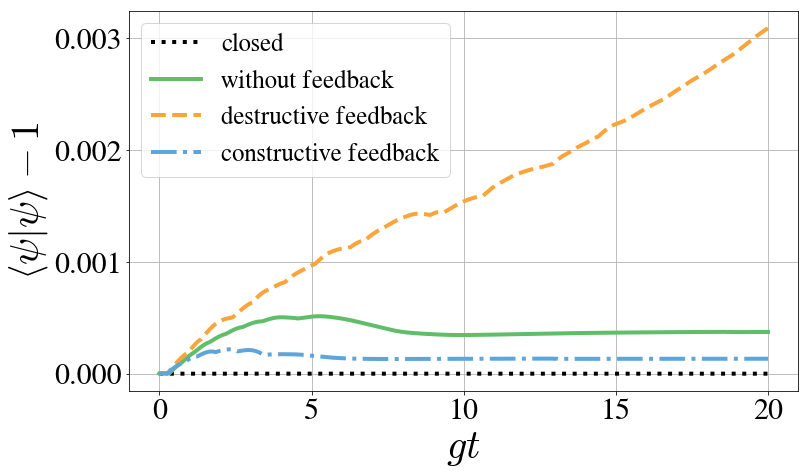

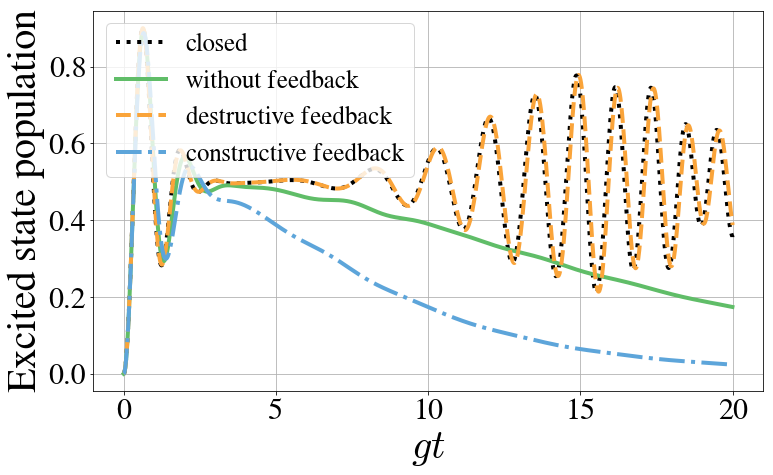

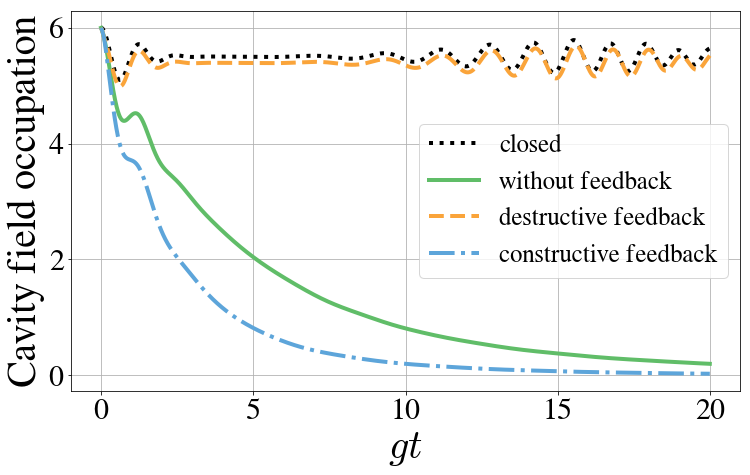

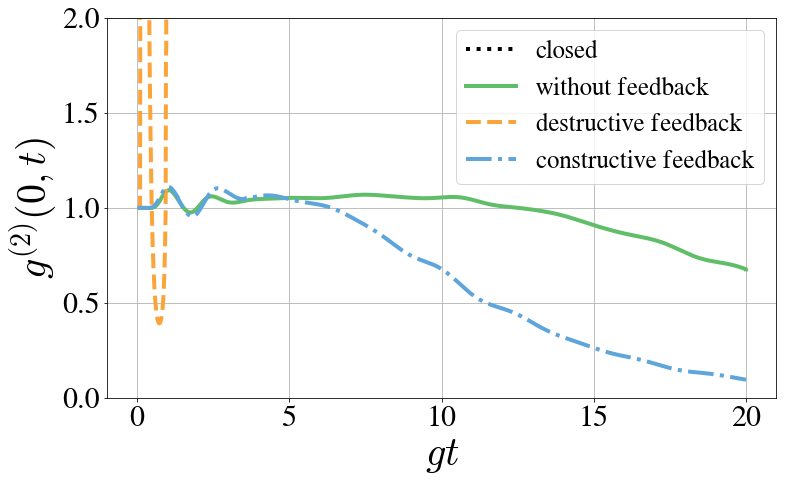

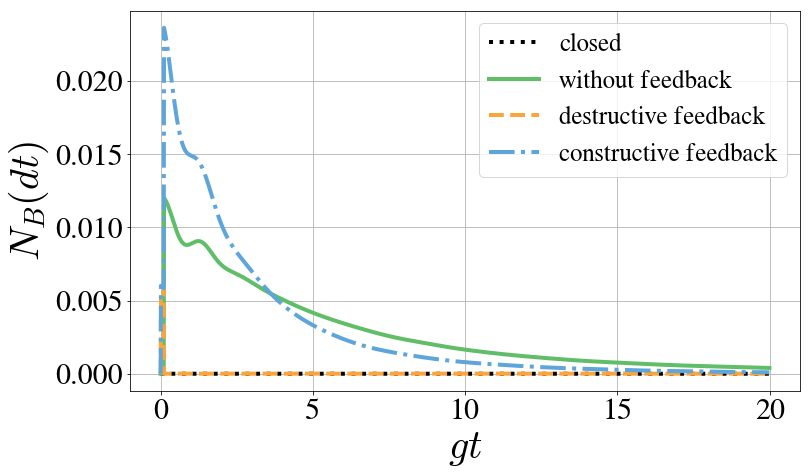

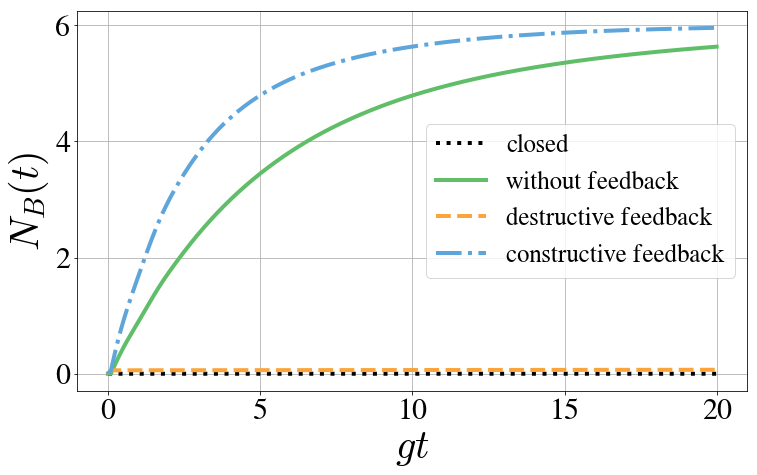

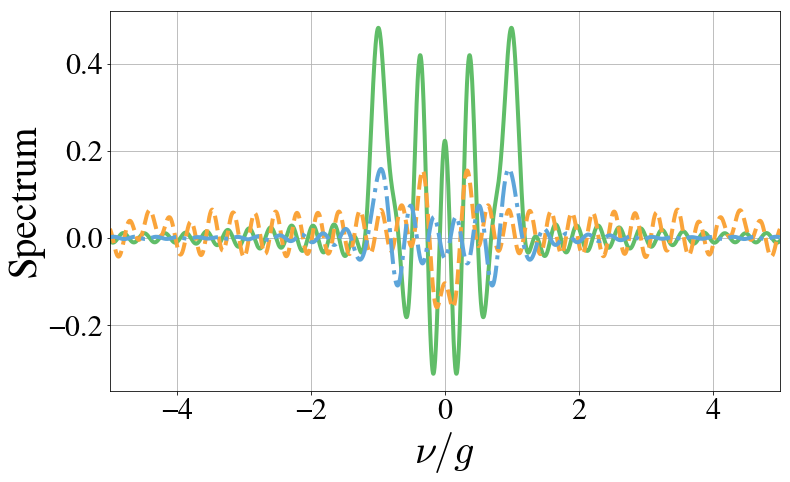

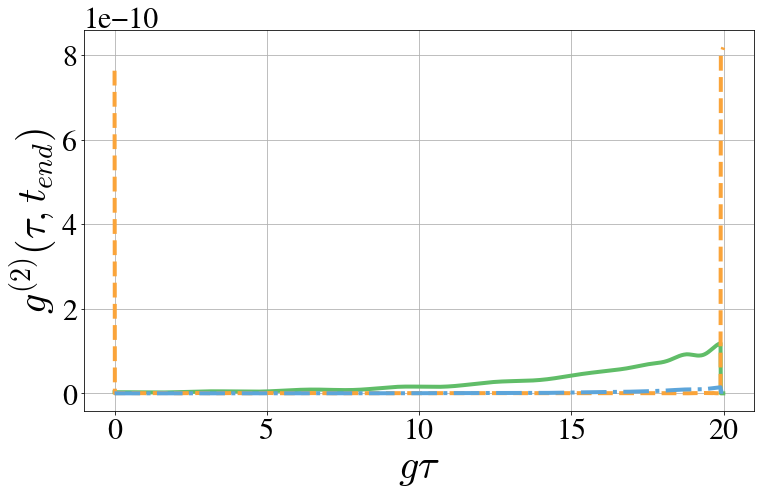

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO

def conv(x):
    return x.replace('+-', '-').encode()

closed = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=0p10_gR=0p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
nofb = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=4p10_gR=0p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
fbc = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=2p10_gR=2p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
fbd = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=2p10_gR=2p10_g=20p10_phi=10p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
specnofb = np.genfromtxt((conv(x) for x in \
                      open("./Data/spec_JC+fb_gL=4p10_gR=0p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
g2taunofb = np.genfromtxt((conv(x) for x in \
                      open("./Data/g2tau_JC+fb_gL=4p10_gR=0p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
specfbc = np.genfromtxt((conv(x) for x in \
                      open("./Data/spec_JC+fb_gL=2p10_gR=2p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
g2taufbc = np.genfromtxt((conv(x) for x in \
                      open("./Data/g2tau_JC+fb_gL=2p10_gR=2p10_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
specfbd = np.genfromtxt((conv(x) for x in \
                      open("./Data/spec_JC+fb_gL=2p10_gR=2p10_g=20p10_phi=10p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
g2taufbd = np.genfromtxt((conv(x) for x in \
                      open("./Data/g2tau_JC+fb_gL=2p10_gR=2p10_g=20p10_phi=10p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
t_cls = closed[:,0]*2.
norm_cls = closed[:,1]
exc_cls = closed[:,2]
gr_cls = closed[:,3]
cav_cls = closed[:,4]
g2_cls = closed[:,5]
NB_cls = closed[:,6]
NBout_cls = closed[:,7]
t_nofb = nofb[:,0]*2.
norm_nofb = nofb[:,1]
exc_nofb = nofb[:,2]
gr_nofb = nofb[:,3]
cav_nofb = nofb[:,4]
g2_nofb = nofb[:,5]
NB_nofb = nofb[:,6]
NBout_nofb = nofb[:,7]
t_defb = fbd[:,0]*2.
norm_defb = fbd[:,1]
exc_defb = fbd[:,2]
gr_defb = fbd[:,3]
cav_defb = fbd[:,4]
g2_defb = fbd[:,5]
NB_defb = fbd[:,6]
NBout_defb = fbd[:,7]
t_cofb = fbc[:,0]*2.
norm_cofb = fbc[:,1]
exc_cofb = fbc[:,2]
gr_cofb = fbc[:,3]
cav_cofb = fbc[:,4]
g2_cofb = fbc[:,5]
NB_cofb = fbc[:,6]
NBout_cofb = fbc[:,7]
om_no = specnofb[:,0]/2.
spect_no = specnofb[:,1]
tau_no = g2taunofb[:,0]*2.
g2t_no = g2taunofb[:,1]
om_c = specfbc[:,0]/2.
spect_c = specfbc[:,1]
tau_c = g2taufbc[:,0]*2.
g2t_c = g2taufbc[:,1]
om_d = specfbd[:,0]/2.
spect_d = specfbd[:,1]
tau_d = g2taufbd[:,0]*2.
g2t_d = g2taufbd[:,1]
#plt.figure(figsize = (12,7))
#plt.plot(t_nofb,norm_nofb-1,lw=3,label="norm",color=colors["red"])
#plt.xlabel("$t$",fontsize=40)
#plt.ylabel("$\left<\psi(t)|\psi(t)\\right>-1$",fontsize=40)
#plt.xlim(0,10)
#plt.grid(True)
plt.figure(figsize = (12,7))
plt.plot(t_cls,norm_cls-1,lw=4,label="closed",ls=":",color=colors["black"])
plt.plot(t_nofb,norm_nofb-1,lw=4,label="without feedback",ls="-",color=colors["green"])
plt.plot(t_defb,norm_defb-1,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(t_cofb,norm_cofb-1,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel("$gt$",fontsize=40)
plt.grid(True)
plt.legend(loc="best",fontsize = 25)
#plt.xlim(0,10)
#plt.ylim(-0.5,0.5)
plt.ylabel("$\left<\psi|\psi\\right>-1$",fontsize=40)
plt.figure(figsize = (12,7))
plt.plot(t_cls,exc_cls,lw=4,label="closed",ls=":",color=colors["black"])
plt.plot(t_nofb,exc_nofb,lw=4,label="without feedback",ls="-",color=colors["green"])
plt.plot(t_defb,exc_defb,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(t_cofb,exc_cofb,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel("$gt$",fontsize=40)
plt.grid(True)
plt.legend(loc="best",fontsize = 25)
plt.ylabel("Excited state population",fontsize=40)
#plt.ylim(-.1,1.1)
#plt.ylim(-0.1,1.1)
#plt.xlim(0,20)
plt.figure(figsize = (12,7))
plt.plot(t_cls,cav_cls,lw=4,label="closed",ls=":",color=colors["black"])
plt.plot(t_nofb,cav_nofb,lw=4,label="without feedback",ls="-",color=colors["green"])
plt.plot(t_defb,cav_defb,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(t_cofb,cav_cofb,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel("$gt$",fontsize=40)
plt.grid(True)
plt.legend(loc="best",fontsize = 25)
plt.ylabel("Cavity field occupation",fontsize=40)
#plt.ylim(0,20)
#plt.xlim(0,20)
#plt.xlim(0,10)
plt.figure(figsize = (12,7))
plt.plot(t_cls,g2_cls,lw=4,label="closed",ls=":",color=colors["black"])
plt.plot(t_nofb,g2_nofb,lw=4,label="without feedback",color=colors["green"])
plt.plot(t_defb,g2_defb,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(t_cofb,g2_cofb,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel("$gt$",fontsize=40)
plt.legend(loc="best",fontsize = 25)
plt.grid(True)
plt.ylabel("$g^{(2)}(0,t)$",fontsize=40)
plt.ylim(0,2)
plt.figure(figsize = (12,7))
plt.plot(t_cls,NB_cls/0.005,lw=4,label="closed",ls=":",color=colors["black"])
plt.plot(t_nofb,NB_nofb/0.005,lw=4,label="without feedback",color=colors["green"])
plt.plot(t_defb,NB_defb/0.005,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(t_cofb,NB_cofb/0.005,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel("$gt$",fontsize=40)
plt.legend(loc="best",fontsize = 25)
plt.grid(True)
plt.ylabel("$N_B(dt)$",fontsize=40)
plt.figure(figsize = (12,7))
plt.plot(t_cls,NBout_cls/0.005,lw=4,label="closed",ls=":",color=colors["black"])
plt.plot(t_nofb,NBout_nofb/0.005,lw=4,label="without feedback",color=colors["green"])
plt.plot(t_defb,NBout_defb/0.005,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(t_cofb,NBout_cofb/0.005,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel("$gt$",fontsize=40)
plt.legend(loc="best",fontsize = 25)
plt.grid(True)
plt.ylabel("$N_B(t)$",fontsize=40)
plt.figure(figsize = (12,7))
plt.plot(om_no,spect_no,lw=4,label="without feedback",color=colors["green"])
plt.plot(om_d,spect_d,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(om_c,spect_c,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel(r"$\nu/g$",fontsize=40)
plt.xlim(-5,5)
plt.grid(True)
plt.ylabel("Spectrum",fontsize=40)
plt.figure(figsize = (12,7))
plt.plot(tau_no,g2t_no,lw=4,label="without feedback",color=colors["green"])
plt.plot(tau_d,g2t_d,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
plt.plot(tau_c,g2t_c,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
plt.xlabel(r"$g\tau$",fontsize=40)
plt.grid(True)
plt.ylabel(r"$g^{(2)}(\tau,t_{end})$",fontsize=40)
plt.show()
#fb1 = np.genfromtxt((conv(x) for x in \
#                      open("FT_D=2000p1000_tau=78554p100_oma=10000p1000_kap=200p1000_endk=9e_Nk=55e_endt=6e_Nt=2e18_nonorm.txt")),dtype=complex)
#fb2 = np.genfromtxt((conv(x) for x in \
#                      open("FT_D=2000p1000_tau=235664p100_oma=10000p1000_kap=200p1000_endk=9e_Nk=55e_endt=6e_Nt=2e18_nonorm.txt")),dtype=complex)

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


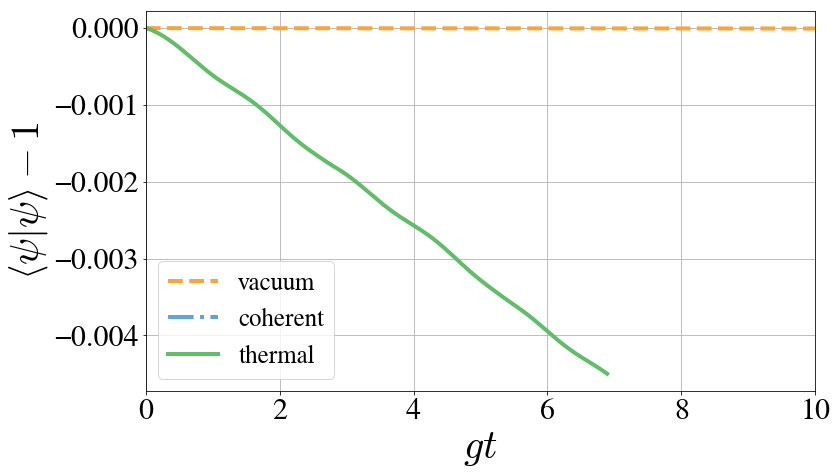

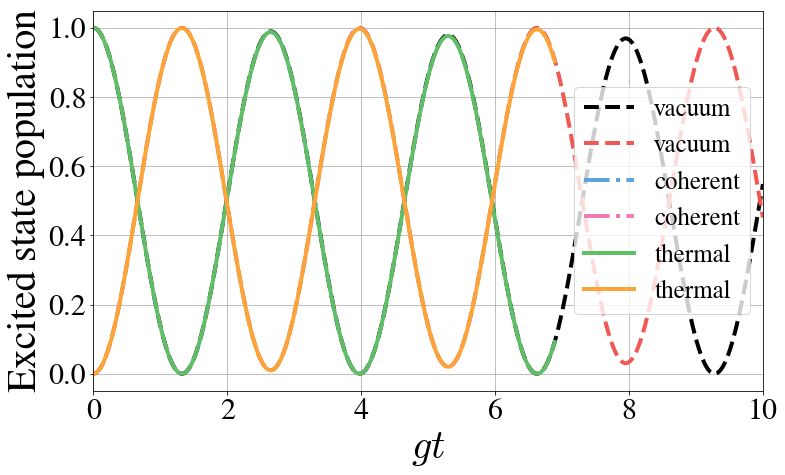

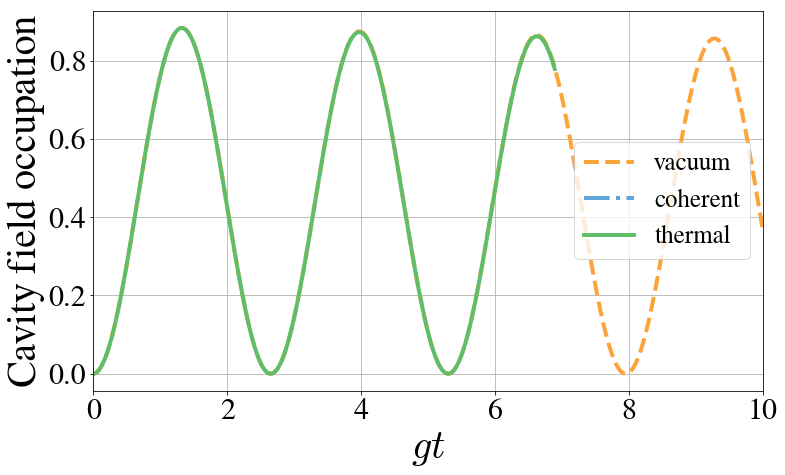

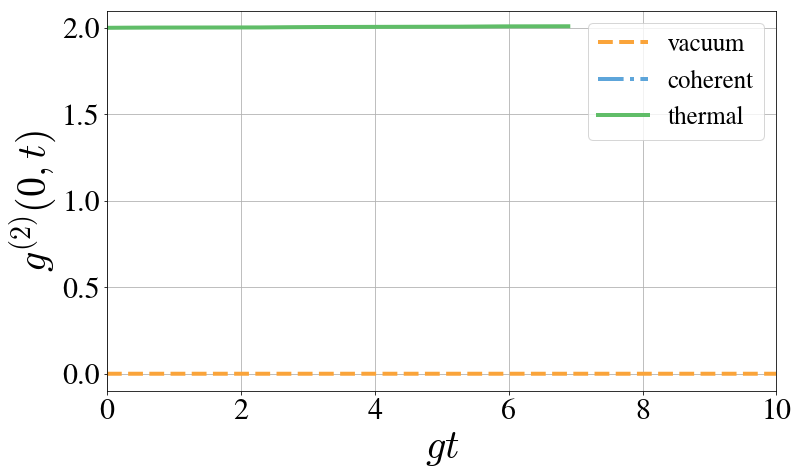

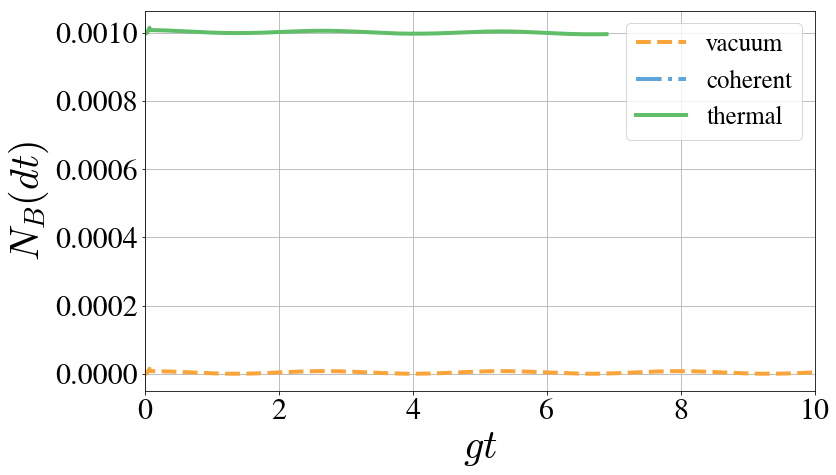

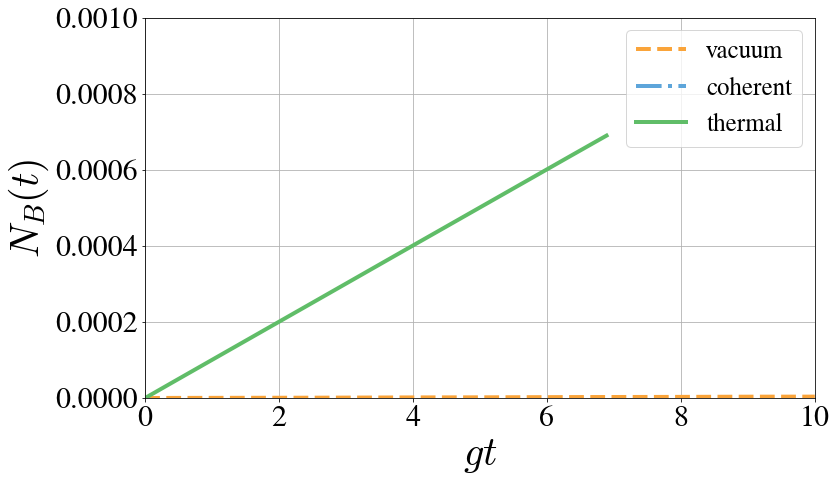

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO

def conv(x):
    return x.replace('+-', '-').encode()

#nofb = np.genfromtxt((conv(x) for x in \
#                      open("./Data/Cluster/evol/14/JC+fb_gL=20p100_gR=0p100_g=20p10_phi=10p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
#fbc = np.genfromtxt((conv(x) for x in \
#                      open("./Data/Cluster/evol/13/JC+fb_gL=15p100_gR=50p100_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=140.txt")),dtype=complex)
#fbd = np.genfromtxt((conv(x) for x in \
#                      open("./Data/Cluster/evol/13/JC+fb_gL=15p100_gR=50p100_g=20p10_phi=0p10pi_cohc=60p10_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
nofb = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=251p10_gR=251p10_g=125p10_phi=10p10pi_nT=1p1000_initind=1_ome=0p10_omc=0p10_L=50.txt")),dtype=complex)
fbc = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=502p10_gR=0p10_g=125p10_phi=10p10pi_nT=1p1000_initind=1_ome=0p10_omc=0p10_L=1.txt")),dtype=complex)
#fbc = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb_gL=251p10_gR=251p10_g=125p10_phi=10p10pi_cohe=0p100_initind=1_ome=0p10_omc=0p10_L=50.txt")),dtype=complex)
#fbd = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb_gL=351p10_gR=151p10_g=125p10_phi=10p10pi_cohe=0p100_initind=1_ome=0p10_omc=0p10_L=50.txt")),dtype=complex)
#fbc = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb_gL=502p10_gR=0p10_g=125p10_phi=10p10pi_cohe=0p100_initind=1_ome=0p10_omc=0p10_L=1.txt")),dtype=complex)
fbd = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb_gL=251p10_gR=251p10_g=125p10_phi=10p10pi_initind=1_ome=0p10_omc=0p10_L=50.txt")),dtype=complex)
#fbd = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb_gL=502p10_gR=0p10_g=125p10_phi=10p10pi_initind=1_ome=0p10_omc=0p10_L=1.txt")),dtype=complex)
#specnofb = np.genfromtxt((conv(x) for x in \
#                      open("./Data/spec_JC+fb_gL=2p10_gR=0p10_g=20p10_phi=0p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
#g2taunofb = np.genfromtxt((conv(x) for x in \
#                      open("./Data/g2tau_JC+fb_gL=2p10_gR=0p10_g=20p10_phi=0p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
#specfbc = np.genfromtxt((conv(x) for x in \
#                      open("./Data/spec_JC+fb_gL=1p10_gR=1p10_g=20p10_phi=0p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
#g2taufbc = np.genfromtxt((conv(x) for x in \
#                      open("./Data/g2tau_JC+fb_gL=1p10_gR=1p10_g=20p10_phi=0p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
#specfbd = np.genfromtxt((conv(x) for x in \
#                      open("./Data/spec_JC+fb_gL=1p10_gR=1p10_g=20p10_phi=10p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
#g2taufbd = np.genfromtxt((conv(x) for x in \
#                      open("./Data/g2tau_JC+fb_gL=1p10_gR=1p10_g=20p10_phi=10p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
g = 10.
t_nofb = nofb[:,0]*g
norm_nofb = nofb[:,1]
exc_nofb = nofb[:,2]
gr_nofb = nofb[:,3]
cav_nofb = nofb[:,4]
g2_nofb = nofb[:,5]
NB_nofb = nofb[:,6]
NBout_nofb = nofb[:,7]
t_defb = fbd[:,0]*g
norm_defb = fbd[:,1]
exc_defb = fbd[:,2]
gr_defb = fbd[:,3]
cav_defb = fbd[:,4]
g2_defb = fbd[:,5]
NB_defb = fbd[:,6]
NBout_defb = fbd[:,7]
t_cofb = fbc[:,0]*g
norm_cofb = fbc[:,1]
exc_cofb = fbc[:,2]
gr_cofb = fbc[:,3]
cav_cofb = fbc[:,4]
g2_cofb = fbc[:,5]
NB_cofb = fbc[:,6]
NBout_cofb = fbc[:,7]
#om_no = specnofb[:,0]/2.
#spect_no = specnofb[:,1]
#tau_no = g2taunofb[:,0]*2.
#g2t_no = g2taunofb[:,1]
#om_c = specfbc[:,0]/2.
#spect_c = specfbc[:,1]
#tau_c = g2taufbc[:,0]*2.
#g2t_c = g2taufbc[:,1]
#om_d = specfbd[:,0]/2.
#spect_d = specfbd[:,1]
#tau_d = g2taufbd[:,0]*2.
#g2t_d = g2taufbd[:,1]
#plt.figure(figsize = (12,7))
#plt.plot(t_nofb,norm_nofb-1,lw=3,label="norm",color=colors["red"])
#plt.xlabel("$t$",fontsize=40)
#plt.ylabel("$\left<\psi(t)|\psi(t)\\right>-1$",fontsize=40)
#plt.xlim(0,10)
#plt.grid(True)
label_no = "thermal"
defb_lab = "vacuum"#"L=10"#"$\gamma_R=.5$"#
cofb_lab = "coherent"#"L=50"#"$\gamma_R=1$"#
plt.figure(figsize = (12,7))
plt.plot(t_defb,norm_defb-1,lw=4,label=defb_lab,ls="--",color=colors["orange"])
plt.plot(t_cofb,norm_cofb-1,lw=4,label=cofb_lab,ls="-.",color=colors["blue"])
plt.plot(t_nofb,norm_nofb-1,lw=4,label=label_no,ls="-",color=colors["green"])
plt.xlabel("$gt$",fontsize=40)
plt.grid(True)
plt.legend(loc="best",fontsize = 25)
plt.xlim(0,10)
#plt.ylim(-0.5,0.5)
plt.ylabel("$\left<\psi|\psi\\right>-1$",fontsize=40)
plt.figure(figsize = (12,7))
plt.plot(t_defb,exc_defb,lw=4,label=defb_lab,ls="--",color=colors["black"])
plt.plot(t_defb,gr_defb,lw=4,label=defb_lab,ls="--",color=colors["red"])
plt.plot(t_cofb,exc_cofb,lw=4,label=cofb_lab,ls="-.",color=colors["blue"])
plt.plot(t_cofb,gr_cofb,lw=4,label=cofb_lab,ls="-.",color=colors["pink"])
plt.plot(t_nofb,exc_nofb,lw=4,label=label_no,ls="-",color=colors["green"])
plt.plot(t_nofb,gr_nofb,lw=4,label=label_no,ls="-",color=colors["orange"])
plt.xlabel("$gt$",fontsize=40)
plt.grid(True)
plt.legend(loc="best",fontsize = 25)
plt.ylabel("Excited state population",fontsize=40)
#plt.ylim(-.1,1.1)
#plt.ylim(-0.1,1.1)
plt.xlim(0,10)
plt.figure(figsize = (12,7))
plt.plot(t_defb,cav_defb,lw=4,label=defb_lab,ls="--",color=colors["orange"])
plt.plot(t_cofb,cav_cofb,lw=4,label=cofb_lab,ls="-.",color=colors["blue"])
plt.plot(t_nofb,cav_nofb,lw=4,label=label_no,ls="-",color=colors["green"])
plt.xlabel("$gt$",fontsize=40)
plt.grid(True)
plt.legend(loc="best",fontsize = 25)
plt.ylabel("Cavity field occupation",fontsize=40)
#plt.figure(figsize = (12,7))
#plt.plot(t_defb,cav_defb-5,lw=4,label="cavity",ls="--",color=colors["brown"])
#plt.plot(t_defb,exc_defb-.5,lw=4,label="atom",ls="--",color=colors["red"])
#plt.legend(loc="best")
#plt.grid(True)
#plt.ylim(0,20)
#plt.xlim(0,20)
plt.xlim(0,10)
plt.figure(figsize = (12,7))
plt.plot(t_defb,g2_defb,lw=4,label=defb_lab,ls="--",color=colors["orange"])
plt.plot(t_cofb,g2_cofb,lw=4,label=cofb_lab,ls="-.",color=colors["blue"])
plt.plot(t_nofb,g2_nofb,lw=4,label=label_no,color=colors["green"])
plt.xlabel("$gt$",fontsize=40)
plt.legend(loc="best",fontsize = 25)
plt.grid(True)
plt.ylabel("$g^{(2)}(0,t)$",fontsize=40)
plt.xlim(0,10)
plt.ylim(-0.1,2.1)
plt.figure(figsize = (12,7))
plt.plot(t_defb,NB_defb,lw=4,label=defb_lab,ls="--",color=colors["orange"])
plt.plot(t_cofb,NB_cofb,lw=4,label=cofb_lab,ls="-.",color=colors["blue"])
plt.plot(t_nofb,NB_nofb,lw=4,label=label_no,color=colors["green"])
plt.xlabel("$gt$",fontsize=40)
plt.legend(loc="best",fontsize = 25)
plt.grid(True)
plt.xlim(0,10)
plt.ylabel("$N_B(dt)$",fontsize=40)
plt.figure(figsize = (12,7))
plt.plot(t_defb,NBout_defb,lw=4,label=defb_lab,ls="--",color=colors["orange"])
plt.plot(t_cofb,NBout_cofb,lw=4,label=cofb_lab,ls="-.",color=colors["blue"])
plt.plot(t_nofb,NBout_nofb,lw=4,label=label_no,color=colors["green"])
plt.xlabel("$gt$",fontsize=40)
plt.legend(loc="best",fontsize = 25)
plt.grid(True)
plt.ylabel("$N_B(t)$",fontsize=40)
plt.xlim(0,10)
plt.ylim(0,0.001)
#plt.figure(figsize = (12,7))
#plt.plot(om_no,spect_no,lw=4,label="without feedback",color=colors["green"])
#plt.plot(om_d,spect_d,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
#plt.plot(om_c,spect_c,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
#plt.xlabel(r"$\nu/g$",fontsize=40)
#plt.xlim(-5,5)
#plt.grid(True)
#plt.ylabel("Spectrum",fontsize=40)
#plt.figure(figsize = (12,7))
#plt.plot(tau_no,g2t_no,lw=4,label="without feedback",color=colors["green"])
#plt.plot(tau_d,g2t_d,lw=4,label="destructive feedback",ls="--",color=colors["orange"])
#plt.plot(tau_c,g2t_c,lw=4,label="constructive feedback",ls="-.",color=colors["blue"])
#plt.xlabel(r"$g\tau$",fontsize=40)
#plt.grid(True)
#plt.ylabel(r"$g^{(2)}(\tau,t_{end})$",fontsize=40)
plt.show()
#fb1 = np.genfromtxt((conv(x) for x in \
#                      open("FT_D=2000p1000_tau=78554p100_oma=10000p1000_kap=200p1000_endk=9e_Nk=55e_endt=6e_Nt=2e18_nonorm.txt")),dtype=complex)
#fb2 = np.genfromtxt((conv(x) for x in \
#                      open("FT_D=2000p1000_tau=235664p100_oma=10000p1000_kap=200p1000_endk=9e_Nk=55e_endt=6e_Nt=2e18_nonorm.txt")),dtype=complex) there

In [16]:
import sys
print(sys.version)

3.5.5 |Anaconda, Inc.| (default, Mar 12 2018, 23:12:44) 
[GCC 7.2.0]


In [317]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import poisson
### Poisson distribution
#mu = 1
def distr(mu):
    x = np.arange(poisson.ppf(0.000000001, mu),
                  poisson.ppf(0.999999999, mu))
    fig=plt.figure(1,figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
    ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
    ax.grid(True)
    plt.show()

Num = widgets.FloatSlider(value = 0., min=0., max=50., step=0.5,\
                           description='$N_{th}$') #Initial excitation number inside the cavity
w = interactive(distr,mu = Num)
#show sliders
display(w)

interactive(children=(FloatSlider(value=0.0, description='$N_{th}$', max=50.0, step=0.5), Output()), _dom_classes=('widget-interact',))